In [761]:
# Load basic libraries
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Univariate Variable Analysis



In [762]:
# Loading Data
data = pd.read_excel('Data_Train.xlsx')
data

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
...,...,...,...,...,...,...,...,...,...
5694,Who Ordered This Truckload of Dung?: Inspiring...,Ajahn Brahm,"Paperback,– 30 Aug 2005",4.9 out of 5 stars,9 customer reviews,“Laugh your way to enlightenment” with this in...,Buddhism (Books),Humour,1009.00
5695,PostCapitalism: A Guide to Our Future,Paul Mason,"Paperback,– 2 Jun 2016",4.1 out of 5 stars,2 customer reviews,'The most important book about our economy and...,Macroeconomics Textbooks,Politics,781.00
5696,The Great Zoo Of China,Matthew Reilly,"Paperback,– 14 Jan 2016",4.1 out of 5 stars,28 customer reviews,The Chinese government has been keeping a secr...,Action & Adventure (Books),"Crime, Thriller & Mystery",449.00
5697,Engleby,Sebastian Faulks,"Paperback,– 27 Mar 2008",1.0 out of 5 stars,1 customer review,Mike Engleby has a secret...\n\nThis is the st...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",108.00


In [763]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         5699 non-null   object 
 1   Author        5699 non-null   object 
 2   Edition       5699 non-null   object 
 3   Reviews       5699 non-null   object 
 4   Ratings       5699 non-null   object 
 5   Synopsis      5699 non-null   object 
 6   Genre         5699 non-null   object 
 7   BookCategory  5699 non-null   object 
 8   Price         5699 non-null   float64
dtypes: float64(1), object(8)
memory usage: 400.8+ KB


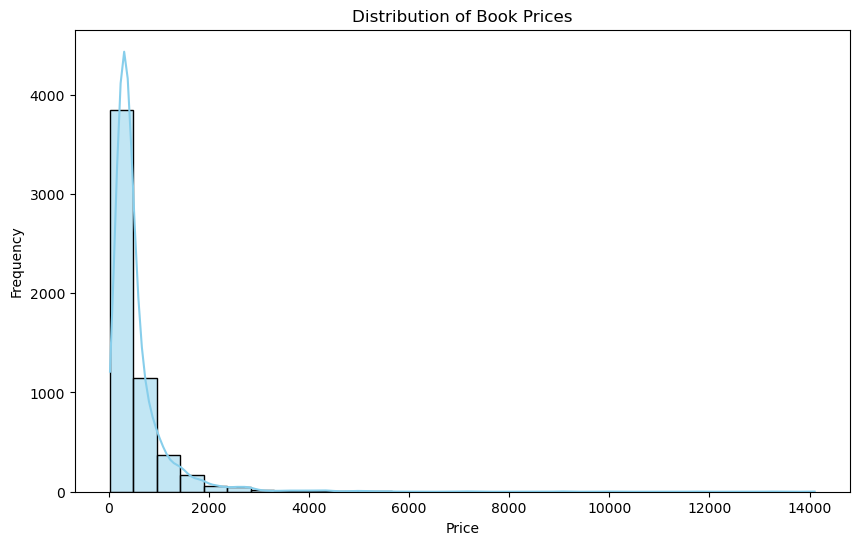

In [764]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis for the 'Price' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Book Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [765]:
# Summary statistics for the 'Price' column
price_summary = data['Price'].describe()

# Print the summary statistics
print(price_summary)


count     5699.000000
mean       554.857428
std        674.363427
min         25.000000
25%        249.000000
50%        373.000000
75%        599.000000
max      14100.000000
Name: Price, dtype: float64


- Count: There are 5699 data points in the 'Price' column.

- Mean: The average price of the books is approximately 554.86.

- Standard Deviation (std): The standard deviation is relatively high at 674.36, indicating a significant amount of variability in book prices.

- Minimum (min): The minimum price is 25, suggesting that there are books with a relatively low price.

- 25th Percentile (25%): 25% of the books have a price less than or equal to 249.

- 50th Percentile (Median - 50%): The median price is 373, meaning that half of the books have a price below 373 and half above.

- 75th Percentile (75%): 75% of the books have a price less than or equal to 599.

- Maximum (max): The maximum price is 14100, indicating that there are books with a considerably high price.

In summary, your dataset has a wide range of book

## Data Preprocessing

### missing values

In [766]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         5699 non-null   object 
 1   Author        5699 non-null   object 
 2   Edition       5699 non-null   object 
 3   Reviews       5699 non-null   object 
 4   Ratings       5699 non-null   object 
 5   Synopsis      5699 non-null   object 
 6   Genre         5699 non-null   object 
 7   BookCategory  5699 non-null   object 
 8   Price         5699 non-null   float64
dtypes: float64(1), object(8)
memory usage: 400.8+ KB


no missing values.

### Check for Duplicates:

In [767]:
# Count the number of duplicate rows in the entire DataFrame
num_duplicates = data.duplicated().sum()

# Display the number of duplicates
print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


In [768]:
duplicate_titles = data[data.duplicated('Title')]
print(duplicate_titles)


                                                  Title               Author  \
208                          Men Without Women: Stories      Haruki Murakami   
453     Supreme Whispers: Supreme Court Judges, 1980-90  Abhinav Chandrachud   
487   No-Drama Discipline: The Whole-Brain Way to Ca...     Daniel J. Siegel   
668                   The Emergency: A Personal History         Coomi Kapoor   
682                                  Atank Se Samjhauta   Dr. Praveen Tiwari   
...                                                 ...                  ...   
5660  Stan Lee's How to Draw Comics: From the Legend...             Stan Lee   
5672  The Other Side of Silence: Voices from the Par...      Urvashi Butalia   
5685  The Strange Death of Europe: Immigration, Iden...       Douglas Murray   
5690                          The Penguin Classics Book          Henry Eliot   
5696                             The Great Zoo Of China       Matthew Reilly   

                              Edition  

In [769]:
duplicate_titles = data[data.duplicated('Title', keep=False)]['Title']
print(duplicate_titles)

2                            Leviathan (Penguin Classics)
7       Yoga Your Home Practice Companion: A Complete ...
9              The Iron King (The Accursed Kings, Book 1)
14                                           Anil's Ghost
20                          The Travelling Cat Chronicles
                              ...                        
5660    Stan Lee's How to Draw Comics: From the Legend...
5672    The Other Side of Silence: Voices from the Par...
5685    The Strange Death of Europe: Immigration, Iden...
5690                            The Penguin Classics Book
5696                               The Great Zoo Of China
Name: Title, Length: 1078, dtype: object


In [770]:
num_duplicated_titles = data.duplicated('Title').sum()
print("Number of duplicated titles:", num_duplicated_titles)


Number of duplicated titles: 569


In [771]:
# Identify and filter rows with duplicated titles
duplicate_titles_mask = data.duplicated('Title', keep=False)
duplicated_titles_data = data[duplicate_titles_mask]

# Check if there is a difference in price
price_difference_count = duplicated_titles_data.groupby('Title')['Price'].nunique().gt(1).sum()

print("Number of duplicated titles with a price difference:", price_difference_count)


Number of duplicated titles with a price difference: 256


In [772]:
# Identify and filter rows with duplicated titles
duplicate_titles_mask = data.duplicated('Title', keep=False)
duplicated_titles_data = data[duplicate_titles_mask]

# Find and display the differences between duplicated rows
differences = duplicated_titles_data[duplicated_titles_data.duplicated(subset=data.columns, keep=False)]
print("Differences between duplicated rows:")
print(differences)

Differences between duplicated rows:
Empty DataFrame
Columns: [Title, Author, Edition, Reviews, Ratings, Synopsis, Genre, BookCategory, Price]
Index: []


### Outliers

Random Forest is generally less sensitive to outliers compared to some other algorithms.

In [701]:
# # Calculate the IQR for 'Price'
# Q1 = data['Price'].quantile(0.25)
# Q3 = data['Price'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the upper and lower bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers
# outliers = data[(data['Price'] < lower_bound) | (data['Price'] > upper_bound)]
# # Print the number of outliers
# print("Number of outliers:", len(outliers))

# # Handling outliers (you can choose to remove or replace them)
# # For example, replacing outliers with the median
# data['Price'] = np.where((data['Price'] < lower_bound) | (data['Price'] > upper_bound), data['Price'].median(), data['Price'])


In [702]:
from scipy.stats import zscore

# Assuming 'data' is your DataFrame
# Select numerical columns for outlier removal (Reviews, Ratings, and Price)
numerical_columns = ['Reviews', 'Ratings', 'Price']

# Calculate Z-scores for the selected columns
z_scores = zscore(data[numerical_columns])

# Set a threshold for Z-scores (e.g., 3, which is a common choice)
threshold = 3

# Find and remove rows with outliers
outliers = (abs(z_scores) > threshold).any(axis=1)
data_no_outliers = data[~outliers]

# Display the shape of the original and modified DataFrames
print("Original data shape:", data.shape)
print("Data shape after removing outliers:", data_no_outliers.shape)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [703]:
# Replace 'data' with 'data_no_outliers'
data = data_no_outliers

# Display the shape of the modified DataFrame
print("Data shape after removing outliers:", data.shape)


NameError: name 'data_no_outliers' is not defined

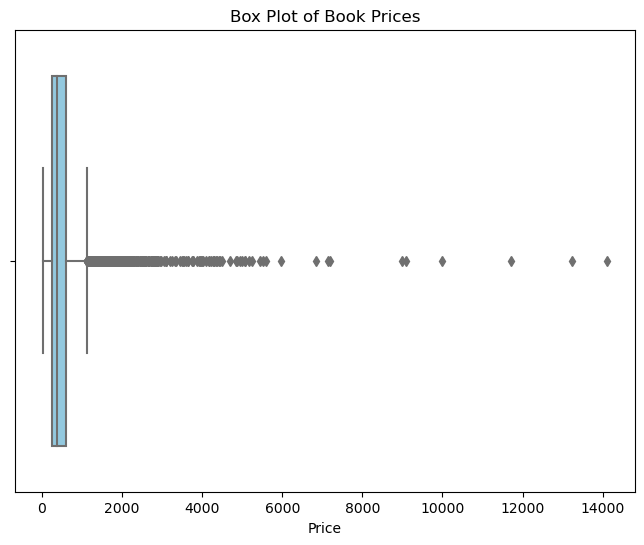

In [704]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for 'Price' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Price'], color='skyblue')
plt.title('Box Plot of Book Prices')
plt.xlabel('Price')
plt.show()


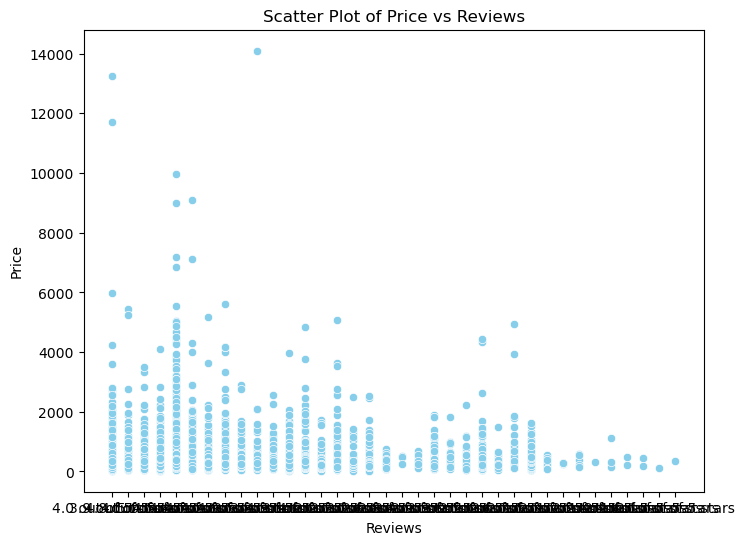

In [705]:
# Scatter plot for 'Price' against another variable (e.g., 'Reviews')
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Reviews'], y=data['Price'], color='skyblue')
plt.title('Scatter Plot of Price vs Reviews')
plt.xlabel('Reviews')
plt.ylabel('Price')
plt.show()


### Convert To numerical

In [773]:
import pandas as pd

# Convert 'Reviews' to numerical feature
data['Reviews'] = data['Reviews'].str.extract('(\d+\.\d+)', expand=False).astype(float)

# Convert 'Ratings' to numerical feature
data['Ratings'] = data['Ratings'].str.extract('(\d+)', expand=False).astype(int)

# Display the updated DataFrame
print(data[['Reviews', 'Ratings']])


      Reviews  Ratings
0         4.0        8
1         3.9       14
2         4.8        6
3         4.1       13
4         5.0        1
...       ...      ...
5694      4.9        9
5695      4.1        2
5696      4.1       28
5697      1.0        1
5698      4.5        7

[5699 rows x 2 columns]


In [774]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         5699 non-null   object 
 1   Author        5699 non-null   object 
 2   Edition       5699 non-null   object 
 3   Reviews       5699 non-null   float64
 4   Ratings       5699 non-null   int32  
 5   Synopsis      5699 non-null   object 
 6   Genre         5699 non-null   object 
 7   BookCategory  5699 non-null   object 
 8   Price         5699 non-null   float64
dtypes: float64(2), int32(1), object(6)
memory usage: 378.6+ KB


### Log Transformations: Applying logarithmic transformations to features to handle skewed distributions and make the data more symmetrical.

In [775]:
import numpy as np

# List of numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# Apply logarithmic transformations
data[numeric_columns] = np.log1p(data[numeric_columns])


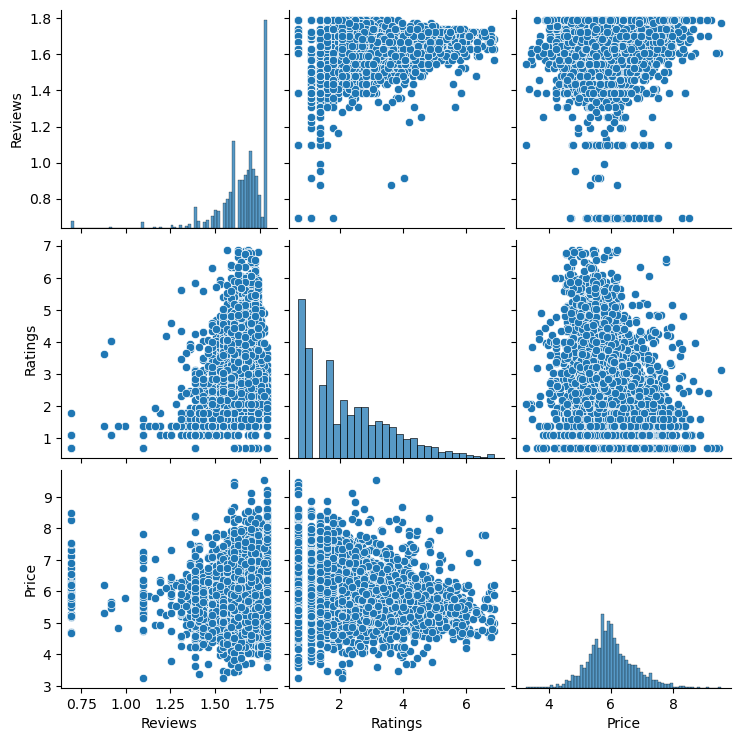

In [776]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for visualization
sns.pairplot(data[numeric_columns])
plt.show()


### Handling Categorical Variables:

### 'Edition' feature,

In [777]:
import re
import pandas as pd
import numpy as np

def extract_features(edition):
    # Define a regular expression to capture the pattern
    pattern = re.compile(r'([^,]+),–\s*(.*?)(?:,\s*(\d{1,2}\s*\w+\s*\d{4}))?$')

    # Try to match the pattern
    match = pattern.match(edition)

    # Initialize variables
    edition_type = ''
    edition_details = ''
    publication_date = 'None'

    # Extract features based on the matched pattern
    if match:
        edition_type = match.group(1).strip()
        edition_details = match.group(2).strip() if match.group(2) else 'None'
        publication_date = match.group(3).strip() if match.group(3) else 'None'

    # If Publication_Date starts with a number, update Edition_Details and Publication_Date
    if publication_date == 'None' and any(char.isdigit() for char in edition_details):
        edition_details, publication_date = 'None', edition_details
        
     # If Publication_Date doesn't start with a number, split it and update Edition_Details and Publication_Date
    if publication_date != 'None' and not publication_date[0].isdigit() and ',' in publication_date:
        parts = publication_date.split(',')
        edition_details = parts[0].strip()
        publication_date = ', '.join(parts[1:]).strip()

    return edition_type, edition_details, publication_date

# Apply the extract_features function to the 'Edition' column
data[['Edition_Type', 'Edition_Details', 'Publication_Date']] = data['Edition'].apply(extract_features).apply(pd.Series)

# Replace 'None' with NaN
data.replace('None', np.nan, inplace=True)

# Display the updated DataFrame
print(data[['Edition_Type', 'Edition_Details', 'Publication_Date']])


     Edition_Type Edition_Details Publication_Date
0       Paperback             NaN      10 Mar 2016
1       Paperback             NaN       7 Nov 2012
2       Paperback             NaN      25 Feb 1982
3       Paperback             NaN       5 Oct 2017
4       Hardcover             NaN      10 Oct 2006
...           ...             ...              ...
5694    Paperback             NaN      30 Aug 2005
5695    Paperback             NaN       2 Jun 2016
5696    Paperback             NaN      14 Jan 2016
5697    Paperback             NaN      27 Mar 2008
5698    Paperback             NaN       3 Mar 2016

[5699 rows x 3 columns]


In [778]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             5699 non-null   object 
 1   Author            5699 non-null   object 
 2   Edition           5699 non-null   object 
 3   Reviews           5699 non-null   float64
 4   Ratings           5699 non-null   float64
 5   Synopsis          5699 non-null   object 
 6   Genre             5699 non-null   object 
 7   BookCategory      5699 non-null   object 
 8   Price             5699 non-null   float64
 9   Edition_Type      5699 non-null   object 
 10  Edition_Details   716 non-null    object 
 11  Publication_Date  5676 non-null   object 
dtypes: float64(3), object(9)
memory usage: 534.4+ KB


In [779]:
import pandas as pd
import re

def extract_date_features(date):
    day, month, year = None, None, None
    
    # Check if the date is not NaN
    if not pd.isna(date):
        # Try to split the date based on common separators
        date_parts = re.split(r'[\s,-/]', date)

        if len(date_parts) == 3:
            day, month, year = date_parts
        elif len(date_parts) == 2:
            month, year = date_parts
        elif len(date_parts) == 1:
            year = date_parts[0]

    return day, month, year

# Apply the extract_date_features function to the 'Publication_Date' column
data[['Day', 'Month', 'Year']] = data['Publication_Date'].apply(extract_date_features).apply(pd.Series)

# Display the updated DataFrame
print(data[['Day', 'Month', 'Year']])



     Day Month  Year
0     10   Mar  2016
1      7   Nov  2012
2     25   Feb  1982
3      5   Oct  2017
4     10   Oct  2006
...   ..   ...   ...
5694  30   Aug  2005
5695   2   Jun  2016
5696  14   Jan  2016
5697  27   Mar  2008
5698   3   Mar  2016

[5699 rows x 3 columns]


In [780]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             5699 non-null   object 
 1   Author            5699 non-null   object 
 2   Edition           5699 non-null   object 
 3   Reviews           5699 non-null   float64
 4   Ratings           5699 non-null   float64
 5   Synopsis          5699 non-null   object 
 6   Genre             5699 non-null   object 
 7   BookCategory      5699 non-null   object 
 8   Price             5699 non-null   float64
 9   Edition_Type      5699 non-null   object 
 10  Edition_Details   716 non-null    object 
 11  Publication_Date  5676 non-null   object 
 12  Day               5290 non-null   object 
 13  Month             5362 non-null   object 
 14  Year              5676 non-null   object 
dtypes: float64(3), object(12)
memory usage: 668.0+ KB


In [781]:
# Convert 'Day', 'Month', and 'Year' columns to numeric format
data['Day'] = pd.to_numeric(data['Day'], errors='coerce')
# Create a mapping for month names to numerical values
month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

# Replace month names with numerical values
data['Month'] = data['Month'].map(month_mapping)

data['Year'] = pd.to_numeric(data['Year'], errors='coerce')


In [782]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             5699 non-null   object 
 1   Author            5699 non-null   object 
 2   Edition           5699 non-null   object 
 3   Reviews           5699 non-null   float64
 4   Ratings           5699 non-null   float64
 5   Synopsis          5699 non-null   object 
 6   Genre             5699 non-null   object 
 7   BookCategory      5699 non-null   object 
 8   Price             5699 non-null   float64
 9   Edition_Type      5699 non-null   object 
 10  Edition_Details   716 non-null    object 
 11  Publication_Date  5676 non-null   object 
 12  Day               5290 non-null   float64
 13  Month             5362 non-null   float64
 14  Year              5676 non-null   float64
dtypes: float64(6), object(9)
memory usage: 668.0+ KB


In [783]:
# Drop 'Edition' and 'Publication_Date' columns
data = data.drop(['Edition', 'Publication_Date'], axis=1)


In [784]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5699 non-null   object 
 1   Author           5699 non-null   object 
 2   Reviews          5699 non-null   float64
 3   Ratings          5699 non-null   float64
 4   Synopsis         5699 non-null   object 
 5   Genre            5699 non-null   object 
 6   BookCategory     5699 non-null   object 
 7   Price            5699 non-null   float64
 8   Edition_Type     5699 non-null   object 
 9   Edition_Details  716 non-null    object 
 10  Day              5290 non-null   float64
 11  Month            5362 non-null   float64
 12  Year             5676 non-null   float64
dtypes: float64(6), object(7)
memory usage: 578.9+ KB


### Sample Data

In [785]:
# Create a copy of the original DataFrame
sample_data = data.copy()

# Now you can perform actions on the 'sample_data' DataFrame without affecting the original 'data' DataFrame
# For example, you can drop columns, modify values, etc.
# Perform other actions as needed

sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5699 non-null   object 
 1   Author           5699 non-null   object 
 2   Reviews          5699 non-null   float64
 3   Ratings          5699 non-null   float64
 4   Synopsis         5699 non-null   object 
 5   Genre            5699 non-null   object 
 6   BookCategory     5699 non-null   object 
 7   Price            5699 non-null   float64
 8   Edition_Type     5699 non-null   object 
 9   Edition_Details  716 non-null    object 
 10  Day              5290 non-null   float64
 11  Month            5362 non-null   float64
 12  Year             5676 non-null   float64
dtypes: float64(6), object(7)
memory usage: 578.9+ KB


## Basic Data Analysis


           Reviews      Ratings        Price          Day        Month  \
count  5699.000000  5699.000000  5699.000000  5290.000000  5362.000000   
mean      1.656726     2.259732     5.990778    13.964272     6.557068   
std       0.147573     1.333298     0.757193     9.930999     3.416307   
min       0.693147     0.693147     3.258097     1.000000     1.000000   
25%       1.609438     1.098612     5.521461     5.000000     4.000000   
50%       1.686399     1.945910     5.924256    14.000000     7.000000   
75%       1.757858     3.091042     6.396930    23.000000    10.000000   
max       1.791759     6.881411     9.554001    31.000000    12.000000   

              Year  
count  5676.000000  
mean   2011.900634  
std       7.924400  
min    1900.000000  
25%    2010.000000  
50%    2015.000000  
75%    2017.000000  
max    2019.000000  


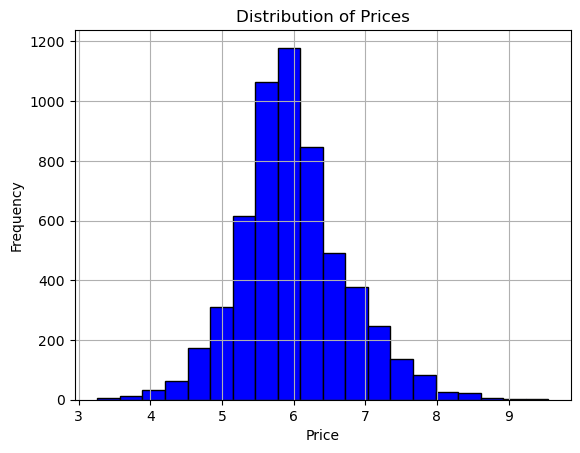

          Reviews   Ratings     Price       Day     Month      Year
Reviews  1.000000 -0.010940  0.143069 -0.046496  0.002600  0.004011
Ratings -0.010940  1.000000 -0.276847 -0.003222  0.031527  0.046233
Price    0.143069 -0.276847  1.000000  0.031097  0.053426 -0.031069
Day     -0.046496 -0.003222  0.031097  1.000000 -0.002478  0.179409
Month    0.002600  0.031527  0.053426 -0.002478  1.000000 -0.009184
Year     0.004011  0.046233 -0.031069  0.179409 -0.009184  1.000000


C:\Users\EXO\AppData\Local\Temp\ipykernel_23048\687109507.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sample_data.corr()


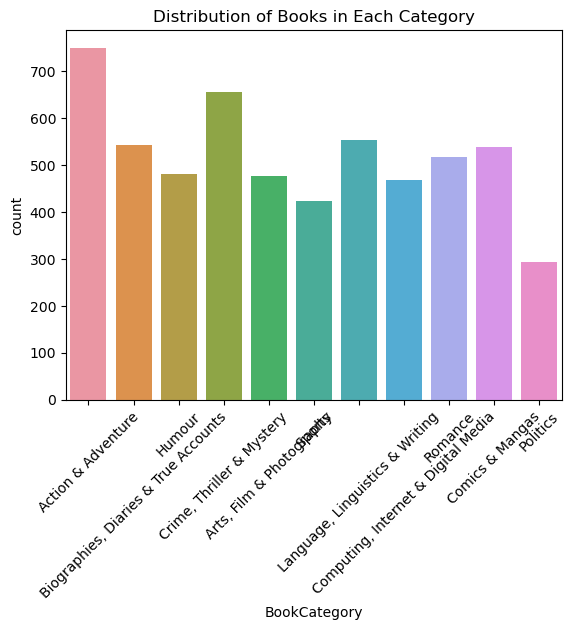

Title                 0
Author                0
Reviews               0
Ratings               0
Synopsis              0
Genre                 0
BookCategory          0
Price                 0
Edition_Type          0
Edition_Details    4983
Day                 409
Month               337
Year                 23
dtype: int64


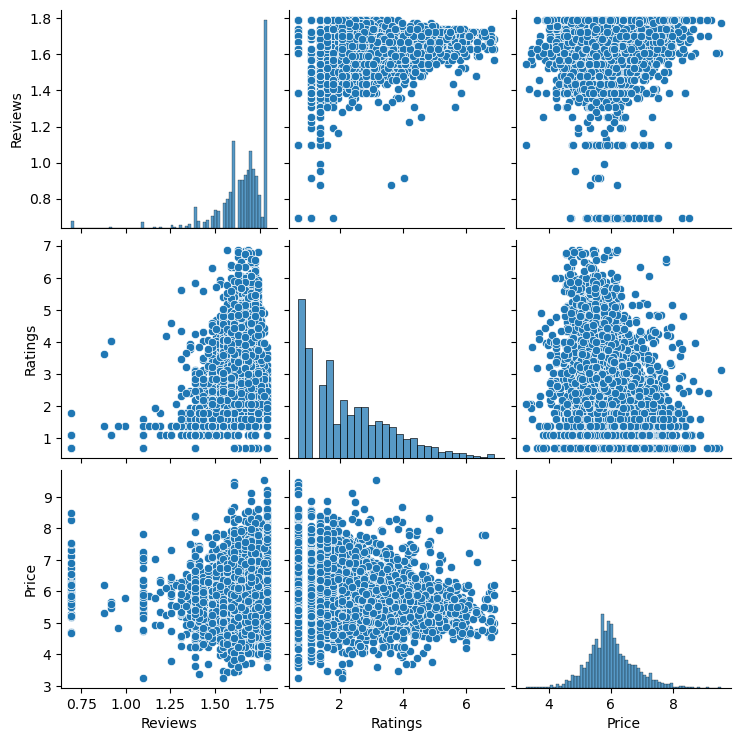

In [786]:
# Summary Statistics
summary_stats = sample_data.describe()
print(summary_stats)

# Distribution of Numeric Features
import matplotlib.pyplot as plt

sample_data['Price'].hist(bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Correlation Analysis
correlation_matrix = sample_data.corr()
print(correlation_matrix)

# Exploratory Data Analysis (EDA) for Categorical Features
import seaborn as sns

sns.countplot(x='BookCategory', data=sample_data)
plt.title('Distribution of Books in Each Category')
plt.xticks(rotation=45)
plt.show()

# Missing Values
missing_values = sample_data.isnull().sum()
print(missing_values)

# Feature Relationships
import seaborn as sns

sns.pairplot(sample_data[['Reviews', 'Ratings', 'Price']])
plt.show()


1. Distribution of Numeric Features:

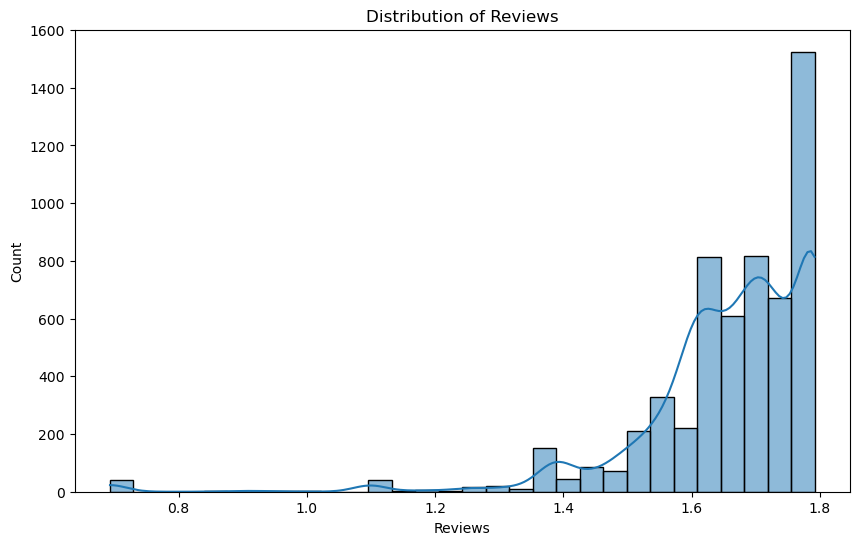

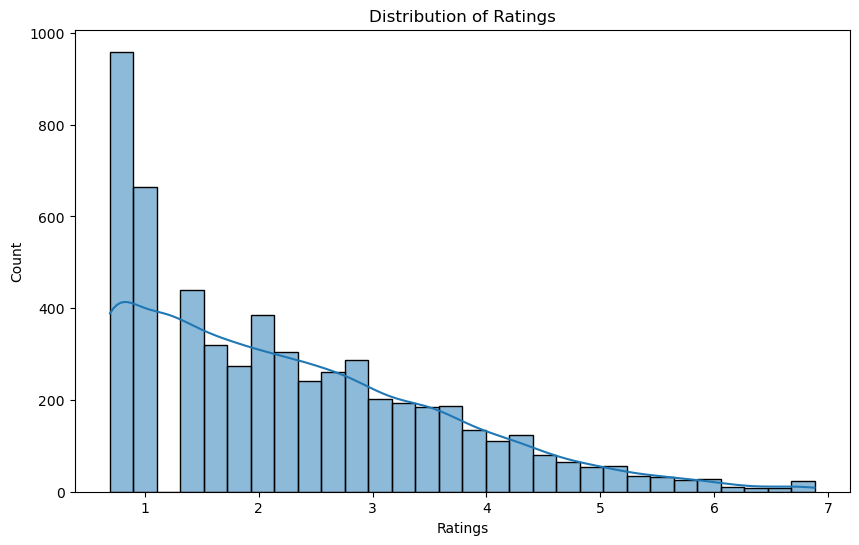

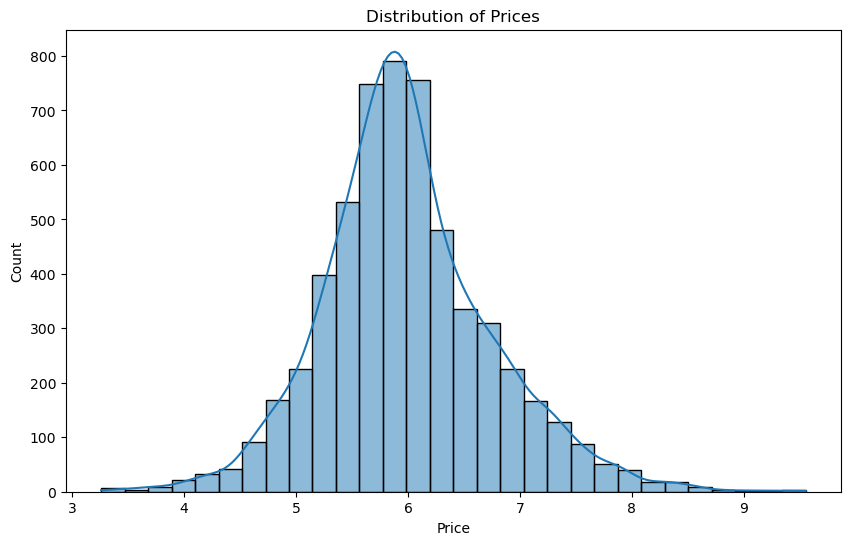

In [787]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'Reviews'
plt.figure(figsize=(10, 6))
sns.histplot(sample_data['Reviews'], bins=30, kde=True)
plt.title('Distribution of Reviews')
plt.show()

# Histogram for 'Ratings'
plt.figure(figsize=(10, 6))
sns.histplot(sample_data['Ratings'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.show()

# Histogram for 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(sample_data['Price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.show()


### 2. Correlation Analysis:

C:\Users\EXO\AppData\Local\Temp\ipykernel_23048\3188844321.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sample_data.corr()


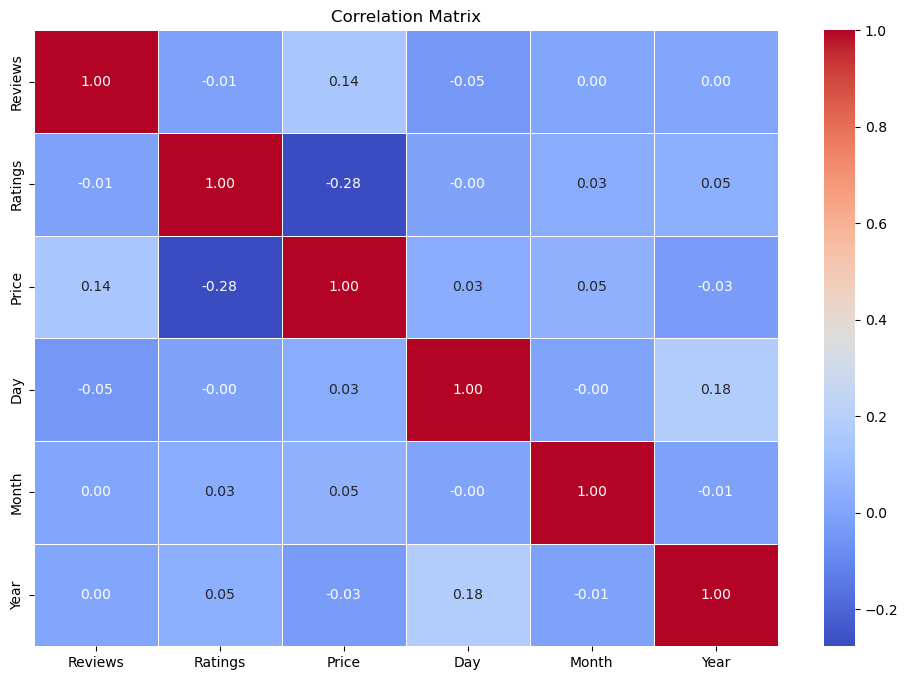

In [789]:
# Correlation matrix
correlation_matrix = sample_data.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


3. Categorical Feature Analysis:

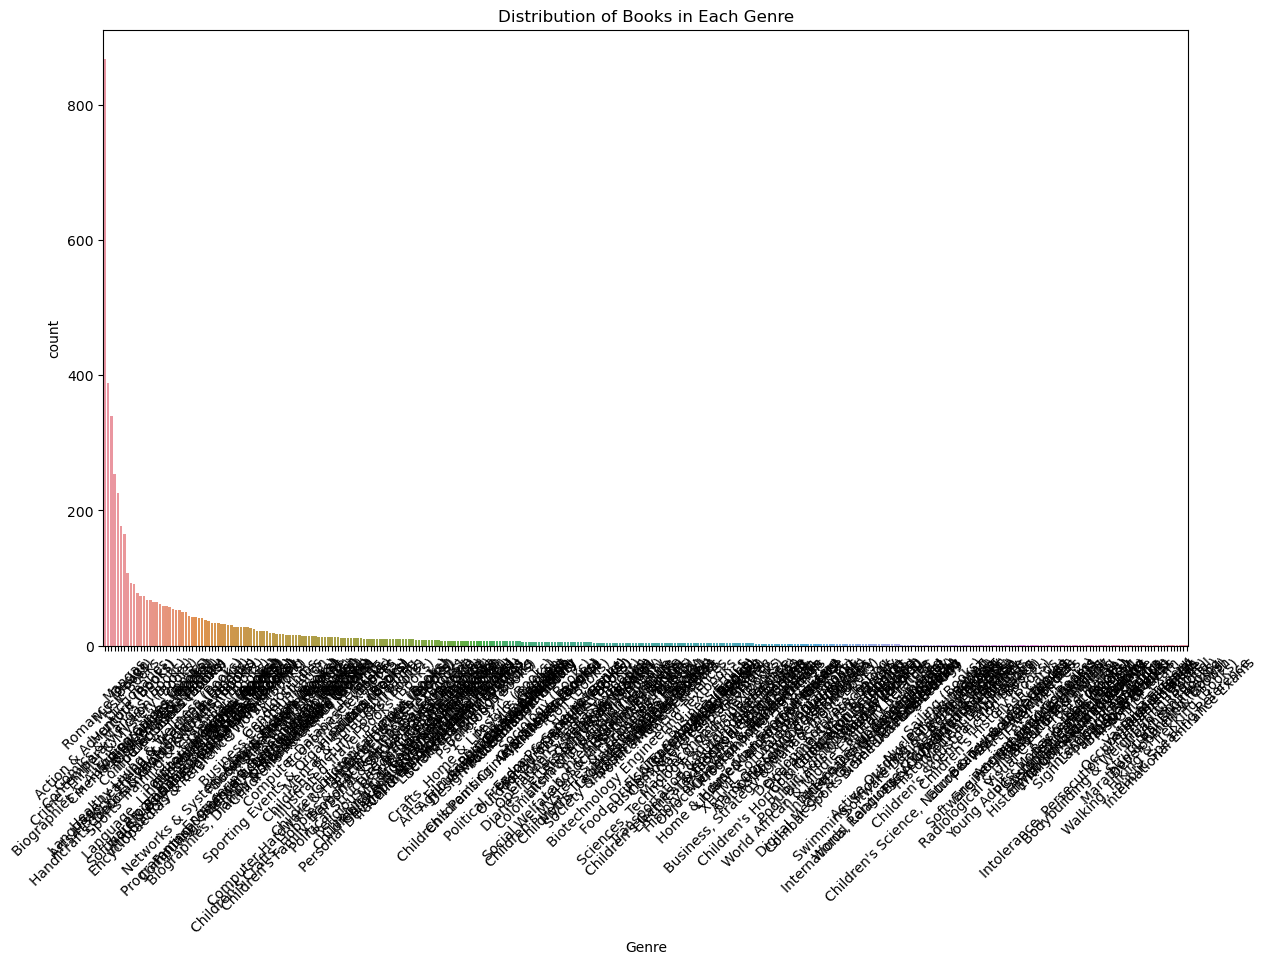

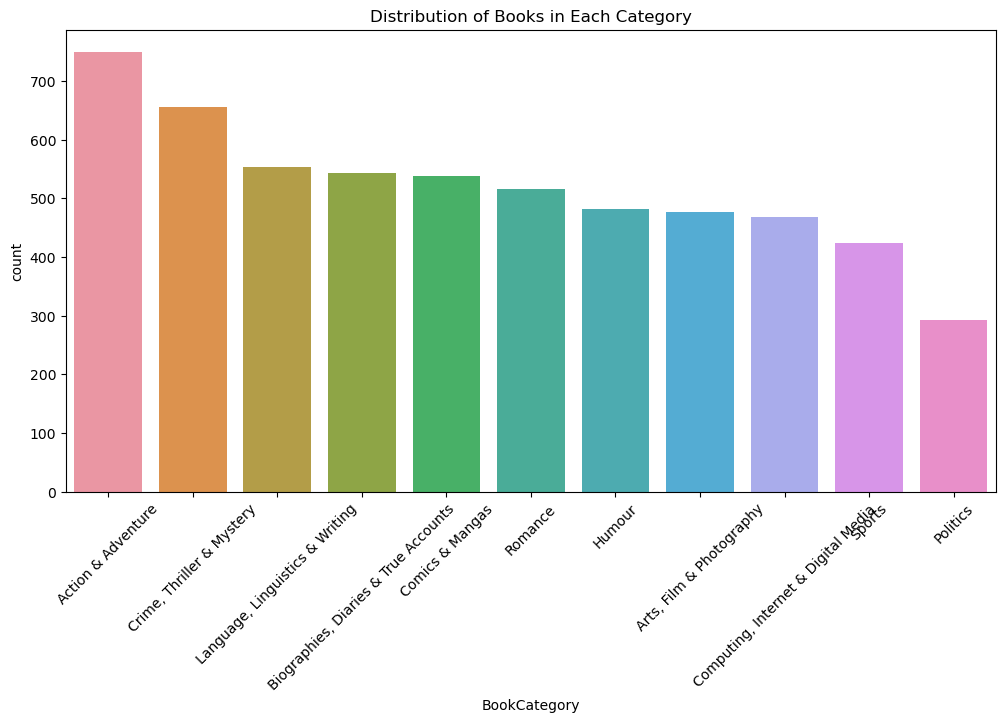

In [790]:
# Count plot for 'Genre'
plt.figure(figsize=(14, 8))
sns.countplot(x='Genre', data=sample_data, order=sample_data['Genre'].value_counts().index)
plt.title('Distribution of Books in Each Genre')
plt.xticks(rotation=45)
plt.show()

# Count plot for 'BookCategory'
plt.figure(figsize=(12, 6))
sns.countplot(x='BookCategory', data=sample_data, order=sample_data['BookCategory'].value_counts().index)
plt.title('Distribution of Books in Each Category')
plt.xticks(rotation=45)
plt.show()


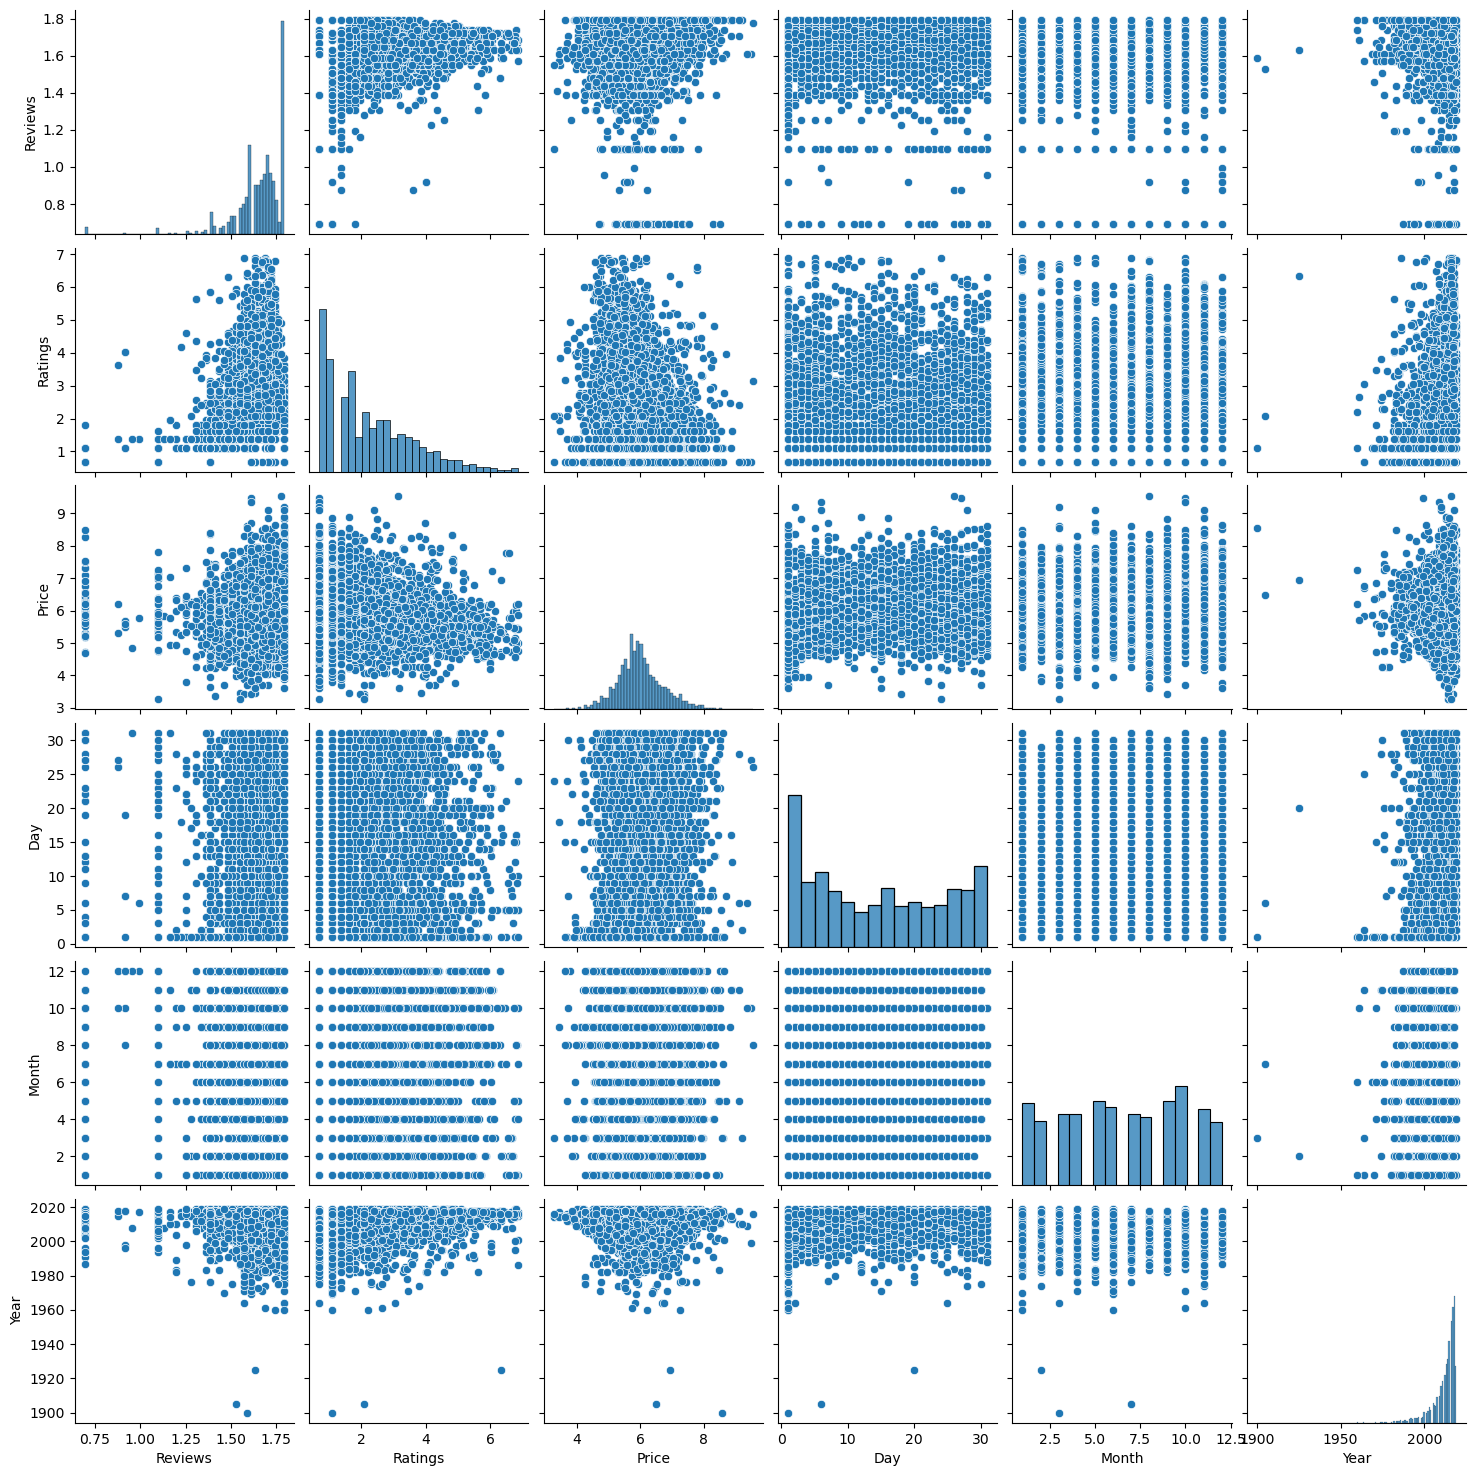

In [792]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = sample_data.select_dtypes(include=[np.number]).columns.tolist()

# Pairplot for visualization
sns.pairplot(sample_data[numeric_columns])
plt.show()


## Feature Engineering

### Edition_Type

In [793]:
unique_values_edition_type_sample = sample_data['Edition_Type'].unique()
print("Unique values in Edition_Type in sample_data:", unique_values_edition_type_sample)


Unique values in Edition_Type in sample_data: ['Paperback' 'Hardcover' 'Mass Market Paperback' 'Sheet music'
 'Flexibound' 'Plastic Comb' 'Loose Leaf' 'Tankobon Softcover'
 'Perfect Paperback' 'Board book' 'Cards' 'Spiral-bound' ''
 'Product Bundle' 'Library Binding' 'Leather Bound']


In [794]:
import pandas as pd


# Group by 'Edition_Type' and calculate the mean price for each group
edition_type_prices = data.groupby('Edition_Type')['Price'].mean()

# Sort the 'Edition_Type' based on mean prices in descending order
sorted_edition_types = edition_type_prices.sort_values(ascending=False)

# Display the sorted mean prices for each 'Edition_Type'
print("Sorted mean prices for each 'Edition_Type':")
for edition_type, mean_price in sorted_edition_types.items():
    print(f"{edition_type}: {mean_price}")


Sorted mean prices for each 'Edition_Type':
Product Bundle: 9.55400099583723
Leather Bound: 7.506591780070841
Plastic Comb: 7.282073658093465
Spiral-bound: 6.752765983020799
Sheet music: 6.603824202150151
Hardcover: 6.4788793423777875
Flexibound: 6.452573671024166
Cards: 6.228224982343001
Tankobon Softcover: 6.193158523264465
Board book: 6.117414145430759
Paperback: 5.916072890835511
Loose Leaf: 5.887337077697753
: 5.785619558658877
Perfect Paperback: 5.7430031878094825
Mass Market Paperback: 5.706331017043968
Library Binding: 5.6937321388027


In [795]:
import pandas as pd
import numpy as np

# # Assuming your DataFrame is named 'data'
# data = pd.read_excel('Data_Train.xlsx')

# # Remove rows with missing prices
# data = data.dropna(subset=['Price'])

# Calculate the weighted mean price for each 'Edition_Type'
weighted_avg_prices = data.groupby('Edition_Type').apply(lambda x: np.average(x['Price'], weights=x['Price']))

# Sort the 'Edition_Type' based on weighted average prices in descending order
sorted_edition_types = weighted_avg_prices.sort_values(ascending=False)

# Display the sorted weighted average prices for each 'Edition_Type'
print("Sorted weighted average prices for each 'Edition_Type':")
for edition_type, weighted_avg_price in sorted_edition_types.items():
    print(f"{edition_type}: {weighted_avg_price}")


Sorted weighted average prices for each 'Edition_Type':
Product Bundle: 9.55400099583723
Leather Bound: 7.506591780070841
Plastic Comb: 7.282073658093465
Spiral-bound: 6.806350107154203
Sheet music: 6.622156753614092
Hardcover: 6.5961423795841565
Flexibound: 6.50952954739626
Cards: 6.345098395640648
Tankobon Softcover: 6.194550250273625
Board book: 6.117414145430759
Paperback: 6.001381272326753
: 5.919782278725618
Loose Leaf: 5.889743059819183
Mass Market Paperback: 5.753092986345305
Perfect Paperback: 5.743003187809483
Library Binding: 5.6937321388027


In [796]:
from sklearn.preprocessing import LabelEncoder

# Create a dictionary mapping Edition_Type to its average price
edition_type_avg_prices = {
    'Product Bundle': 16,
    'Hardcover': 15,
    'Leather Bound': 14,
    'Plastic Comb': 13,
    'Spiral-bound': 12,
    'Paperback': 11,
    'Flexibound': 10,
    'Sheet music': 9,
    'Cards': 8,
    '': 7,
    'Tankobon Softcover': 6,
    'Mass Market Paperback': 5,
    'Board book': 4,
    'Loose Leaf': 3,
    'Perfect Paperback': 2,
    'Library Binding': 1
}

# Create a new column 'Edition_Type_Encoded' using the average prices as labels
sample_data['Edition_Type_Encoded'] = sample_data['Edition_Type'].map(edition_type_avg_prices)

# Display the DataFrame with the new 'Edition_Type_Encoded' column
print(sample_data[['Edition_Type', 'Edition_Type_Encoded']])


     Edition_Type  Edition_Type_Encoded
0       Paperback                    11
1       Paperback                    11
2       Paperback                    11
3       Paperback                    11
4       Hardcover                    15
...           ...                   ...
5694    Paperback                    11
5695    Paperback                    11
5696    Paperback                    11
5697    Paperback                    11
5698    Paperback                    11

[5699 rows x 2 columns]


In [797]:
# Assuming your DataFrame is named 'data'
unique_edition_details = sample_data['Edition_Details'].unique()

# Display the unique values
print("Unique values in Edition_Details:", unique_edition_details)


Unique values in Edition_Details: [nan 'Import' 'Deckle Edge' 'Box set' 'International Edition' 'Unabridged'
 'Special Edition' 'Student Edition' 'Illustrated' 'Abridged, Import'
 'DVD, NTSC' 'Bargain Price' 'Large Print' 'Abridged'
 'Illustrated, Import' 'Audiobook' 'Print' 'Large Print, Import'
 'Import, Facsimile' 'Abridged, Audiobook, Box set'
 'Student Edition, Special Edition' 'Audiobook, Unabridged' 'Facsimile'
 'Abridged, Audiobook, Large Print' '' 'Deluxe Edition' 'Kindle eBook'
 'Facsimile, Import' 'Illustrated, Large Print, Audiobook' 'EveryBook']


In [798]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 5699 non-null   object 
 1   Author                5699 non-null   object 
 2   Reviews               5699 non-null   float64
 3   Ratings               5699 non-null   float64
 4   Synopsis              5699 non-null   object 
 5   Genre                 5699 non-null   object 
 6   BookCategory          5699 non-null   object 
 7   Price                 5699 non-null   float64
 8   Edition_Type          5699 non-null   object 
 9   Edition_Details       716 non-null    object 
 10  Day                   5290 non-null   float64
 11  Month                 5362 non-null   float64
 12  Year                  5676 non-null   float64
 13  Edition_Type_Encoded  5699 non-null   int64  
dtypes: float64(6), int64(1), object(7)
memory usage: 623.5+ KB


In [799]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'sample_data'

# Calculate the weighted mean price for each 'BookCategory'
weighted_avg_prices_book_category = sample_data.groupby('BookCategory').apply(lambda x: np.average(x['Price'], weights=x['Price']))

# Sort the 'BookCategory' based on weighted average prices in descending order
sorted_book_categories = weighted_avg_prices_book_category.sort_values(ascending=False)

# Display the sorted weighted average prices for each 'BookCategory'
print("Sorted weighted average prices for each 'BookCategory':")
for book_category, weighted_avg_price in sorted_book_categories.items():
    print(f"{book_category}: {weighted_avg_price}")

# Calculate the weighted mean price for each 'Genre'
weighted_avg_prices_genre = sample_data.groupby('Genre').apply(lambda x: np.average(x['Price'], weights=x['Price']))

# Sort the 'Genre' based on weighted average prices in descending order
sorted_genres = weighted_avg_prices_genre.sort_values(ascending=False)

# Display the sorted weighted average prices for each 'Genre'
print("\nSorted weighted average prices for each 'Genre':")
for genre, weighted_avg_price in sorted_genres.items():
    print(f"{genre}: {weighted_avg_price}")


Sorted weighted average prices for each 'BookCategory':
Computing, Internet & Digital Media: 6.614991148947141
Arts, Film & Photography: 6.491896833714684
Sports: 6.41867336863314
Comics & Mangas: 6.348797997110355
Humour: 6.288613122119165
Politics: 6.084257796035497
Action & Adventure: 5.884510737385221
Language, Linguistics & Writing: 5.86855196035509
Biographies, Diaries & True Accounts: 5.7582950870584995
Crime, Thriller & Mystery: 5.699418633627517
Romance: 5.672079466473072

Sorted weighted average prices for each 'Genre':
SAT: 8.55230161452952
Travel with Pets: 8.395926846074634
Dance (Books): 7.719129840906732
GMAT: 7.634820677745543
Foreign Languages: 7.59279228565984
Military Sciences: 7.511701784040675
Waste Management: 7.510977752014095
Software Design & Engineering: 7.482681828154651
XHTML Software Programming: 7.404229012003
API & Operating Environments: 7.401527130201356
Painting Textbooks: 7.3938782901077555
Art Encyclopedias: 7.369600720526409
IT Certification Exams: 

In [800]:
from sklearn.preprocessing import LabelEncoder

# Calculate the weighted mean price for each 'BookCategory'
weighted_avg_prices = sample_data.groupby('BookCategory')['Price'].mean()

# Create label encoder
label_encoder = LabelEncoder()

# Map the weighted average prices to the original dataframe
sample_data['BookCategory_Encoded'] = sample_data['BookCategory'].map(weighted_avg_prices)

# Sort the categories based on weighted average prices
sorted_categories = weighted_avg_prices.sort_values(ascending=False).index

# Create a dictionary to map categories to encoded values
category_encoding_dict = {category: i for i, category in enumerate(sorted_categories)}

# Apply the final encoding to 'BookCategory'
sample_data['BookCategory_Encoded'] = sample_data['BookCategory'].map(category_encoding_dict)


In [801]:
print(sample_data['BookCategory_Encoded'])

0       6
1       8
2       4
3       9
4       1
       ..
5694    4
5695    5
5696    9
5697    9
5698    4
Name: BookCategory_Encoded, Length: 5699, dtype: int64


In [802]:
from sklearn.preprocessing import LabelEncoder

# Calculate the weighted mean price for each 'BookCategory'
weighted_avg_prices = sample_data.groupby('BookCategory').apply(lambda x: np.average(x['Price'], weights=x['Price']))

# Create a dictionary to map categories to their corresponding weighted average prices
category_price_mapping = weighted_avg_prices.to_dict()

# Create a new column 'BookCategory_Encoded' using the mapping
sample_data['BookCategory_Encoded'] = sample_data['BookCategory'].map(category_price_mapping)


In [803]:
most_expensive_category = sample_data.loc[sample_data['BookCategory_Encoded'].idxmax(), 'BookCategory']
print(f"The most expensive category is: {most_expensive_category}")




The most expensive category is: Computing, Internet & Digital Media


In [804]:
from sklearn.preprocessing import LabelEncoder

# Calculate the weighted mean price for each 'Genre'
weighted_avg_prices_genre = sample_data.groupby('Genre').apply(lambda x: np.average(x['Price'], weights=x['Price']))

# Create a dictionary to map genres to their corresponding weighted average prices
genre_price_mapping = weighted_avg_prices_genre.to_dict()

# Create a new column 'Genre_Encoded' using the mapping
sample_data['Genre_Encoded'] = sample_data['Genre'].map(genre_price_mapping)


In [805]:
sample_data['Has_Edition_Details'] = sample_data['Edition_Details'].notnull().astype(int)


In [806]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 5699 non-null   object 
 1   Author                5699 non-null   object 
 2   Reviews               5699 non-null   float64
 3   Ratings               5699 non-null   float64
 4   Synopsis              5699 non-null   object 
 5   Genre                 5699 non-null   object 
 6   BookCategory          5699 non-null   object 
 7   Price                 5699 non-null   float64
 8   Edition_Type          5699 non-null   object 
 9   Edition_Details       716 non-null    object 
 10  Day                   5290 non-null   float64
 11  Month                 5362 non-null   float64
 12  Year                  5676 non-null   float64
 13  Edition_Type_Encoded  5699 non-null   int64  
 14  BookCategory_Encoded  5699 non-null   float64
 15  Genre_Encoded        

In [807]:
# Drop unnecessary columns
sample_data.drop(['Genre', 'BookCategory', 'Edition_Type', 'Edition_Details'], axis=1, inplace=True)


In [808]:
# Create a new feature 'Synopsis_Length'
sample_data['Synopsis_Length'] = sample_data['Synopsis'].apply(lambda x: len(str(x)))
sample_data['Title-lenght'] = sample_data['Title'].apply(lambda x: len(str(x)))
sample_data['Author-lenght'] = sample_data['Author'].apply(lambda x: len(str(x)))
# Display the updated DataFrame
print(sample_data.head())


                                        Title           Author   Reviews  \
0         The Prisoner's Gold (The Hunters 3)   Chris Kuzneski  1.609438   
1          Guru Dutt: A Tragedy in Three Acts     Arun Khopkar  1.589235   
2                Leviathan (Penguin Classics)    Thomas Hobbes  1.757858   
3          A Pocket Full of Rye (Miss Marple)  Agatha Christie  1.629241   
4  LIFE 70 Years of Extraordinary Photography  Editors of Life  1.791759   

    Ratings                                           Synopsis     Price  \
0  2.197225  THE HUNTERS return in their third brilliant no...  5.398163   
1  2.708050  A layered portrait of a troubled genius for wh...  5.317777   
2  1.945910  "During the time men live without a common Pow...  5.703782   
3  2.639057  A handful of grain is found in the pocket of a...  5.198497   
4  0.693147  For seven decades, "Life" has been thrilling t...  6.873805   

    Day  Month    Year  Edition_Type_Encoded  BookCategory_Encoded  \
0  10.0    3.0  

In [809]:
# Print the names of the first 100 authors without ellipses
for author in sample_data['Author'].head(1000):
    print(author)


Chris Kuzneski
Arun Khopkar
Thomas Hobbes
Agatha Christie
Editors of Life
Danny Dreyer
Agatha Christie
Sivananda Yoga Vedanta Centre
M S Ashokan
Maurice Druon
Rajiv Malhotra
Don Tapscott, Alex Tapscott
James Clavell
Wong Kiew Kit
Michael Ondaatje
Matthew K Manning
Charlotte Guillain, Roland Dry
Takashi Yano
Will Durant
Davy Cielen, Arno D.B. Meysman, Mohamed Ali
Hiro Arikawa
Luca Caioli
Mario Puzo
Murugesan Ramaswamy
Jenny Russ
Robert Neuwirth
Shantanu Guha Ray
Osamu Tezuka
Brian Shields
C. G. Jung, Aniela Jaffe, Clara Winston, Richard Winston
David Baldacci
Ross Macdonald, Tom Nolan
Hart Defouw
Sidney Sheldon
Naughty Dog
Thomas Harris
Reema Thareja
Palden Gyatso Tenzing
Daniel Silva
HBR
George Orwell
Doug Dorst
Dict.
Ella Frances Sanders
Taylor Jenkins Reid
Bear Grylls
David Dutkanicz
S. Hussain Zaidi
Oliver Bowden
Mark Crilley
Clive Cussler
Coomi Kapoor
Abrsm
Michael Crichton
Ranata Suzuki
Priya-Alika Elias
Vikram Bhatt
Bob Eckstein
Fredrik Backman
Herge
Richard Mansfield
Ullekh N P


In [810]:
# Split authors by comma and create a list of all authors
all_authors_list = [author.strip() for book_authors in sample_data['Author'] for author in book_authors.split(',')]

# Find the number of unique authors
unique_authors = set(all_authors_list)
num_unique_authors = len(unique_authors)

# Print the number of unique authors
print("Number of Unique Authors:", num_unique_authors)

# Create a feature indicating if a book has more than 1 author
sample_data['Multiple_Authors'] = sample_data['Author'].apply(lambda x: ',' in x)


Number of Unique Authors: 3724


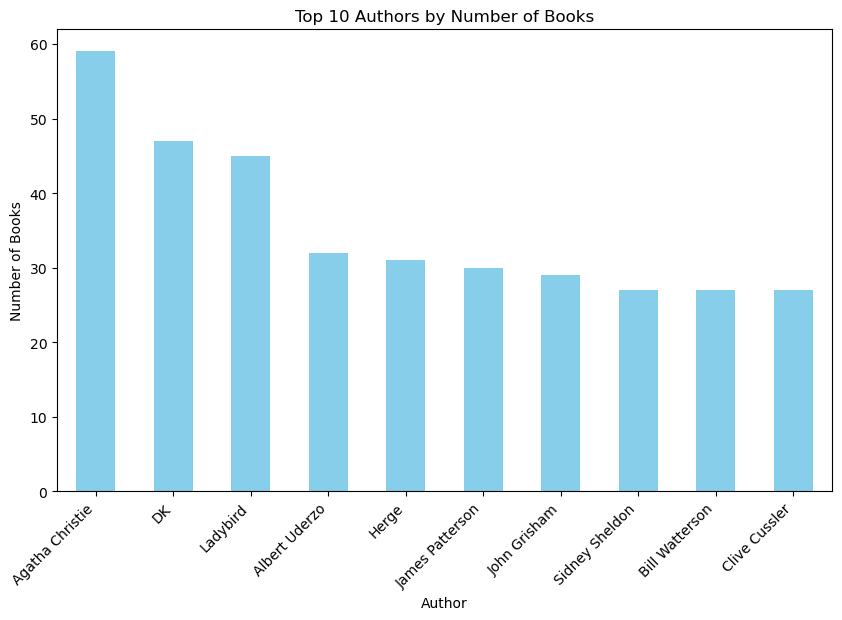

In [811]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with an 'Author' column
top_authors = sample_data['Author'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.show()


In [812]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 5699 non-null   object 
 1   Author                5699 non-null   object 
 2   Reviews               5699 non-null   float64
 3   Ratings               5699 non-null   float64
 4   Synopsis              5699 non-null   object 
 5   Price                 5699 non-null   float64
 6   Day                   5290 non-null   float64
 7   Month                 5362 non-null   float64
 8   Year                  5676 non-null   float64
 9   Edition_Type_Encoded  5699 non-null   int64  
 10  BookCategory_Encoded  5699 non-null   float64
 11  Genre_Encoded         5699 non-null   float64
 12  Has_Edition_Details   5699 non-null   int32  
 13  Synopsis_Length       5699 non-null   int64  
 14  Title-lenght          5699 non-null   int64  
 15  Author-lenght        

In [813]:
sample_data['Day'].fillna(sample_data['Day'].mean(), inplace=True)
sample_data['Month'].fillna(sample_data['Month'].median(), inplace=True)
sample_data['Year'].fillna(sample_data['Year'].mean(), inplace=True)


### Datetime Features

In [814]:
import pandas as pd

# Assuming 'sample_data' is your DataFrame

# Calculate the age of the book
current_year = pd.to_datetime('now').year
sample_data['Book_Age'] = current_year - sample_data['Year']
# Display the updated DataFrame
print(sample_data.head())


                                        Title           Author   Reviews  \
0         The Prisoner's Gold (The Hunters 3)   Chris Kuzneski  1.609438   
1          Guru Dutt: A Tragedy in Three Acts     Arun Khopkar  1.589235   
2                Leviathan (Penguin Classics)    Thomas Hobbes  1.757858   
3          A Pocket Full of Rye (Miss Marple)  Agatha Christie  1.629241   
4  LIFE 70 Years of Extraordinary Photography  Editors of Life  1.791759   

    Ratings                                           Synopsis     Price  \
0  2.197225  THE HUNTERS return in their third brilliant no...  5.398163   
1  2.708050  A layered portrait of a troubled genius for wh...  5.317777   
2  1.945910  "During the time men live without a common Pow...  5.703782   
3  2.639057  A handful of grain is found in the pocket of a...  5.198497   
4  0.693147  For seven decades, "Life" has been thrilling t...  6.873805   

    Day  Month    Year  Edition_Type_Encoded  BookCategory_Encoded  \
0  10.0    3.0  

C:\Users\EXO\AppData\Local\Temp\ipykernel_23048\4283138276.py:6: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  current_year = pd.to_datetime('now').year


In [815]:
from datetime import datetime



In [816]:
# Create a new feature 'Day_of_Week_From_Date'
sample_data['Day_of_Week_From_Date'] = sample_data.apply(lambda row: datetime(int(row['Year']), int(row['Month']), int(row['Day'])).strftime('%A'), axis=1)

In [817]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  5699 non-null   object 
 1   Author                 5699 non-null   object 
 2   Reviews                5699 non-null   float64
 3   Ratings                5699 non-null   float64
 4   Synopsis               5699 non-null   object 
 5   Price                  5699 non-null   float64
 6   Day                    5699 non-null   float64
 7   Month                  5699 non-null   float64
 8   Year                   5699 non-null   float64
 9   Edition_Type_Encoded   5699 non-null   int64  
 10  BookCategory_Encoded   5699 non-null   float64
 11  Genre_Encoded          5699 non-null   float64
 12  Has_Edition_Details    5699 non-null   int32  
 13  Synopsis_Length        5699 non-null   int64  
 14  Title-lenght           5699 non-null   int64  
 15  Auth

In [818]:
sample_data['Day_of_Week_From_Date']

0        Thursday
1       Wednesday
2        Thursday
3        Thursday
4         Tuesday
          ...    
5694      Tuesday
5695     Thursday
5696     Thursday
5697     Thursday
5698     Thursday
Name: Day_of_Week_From_Date, Length: 5699, dtype: object

In [819]:
# Assuming 'sample_data' is your DataFrame

# Perform one-hot encoding on 'Day_of_Week_From_Date'
sample_data = pd.get_dummies(sample_data, columns=['Day_of_Week_From_Date'], drop_first=True)

# Display the updated DataFrame
print(sample_data.head())


                                        Title           Author   Reviews  \
0         The Prisoner's Gold (The Hunters 3)   Chris Kuzneski  1.609438   
1          Guru Dutt: A Tragedy in Three Acts     Arun Khopkar  1.589235   
2                Leviathan (Penguin Classics)    Thomas Hobbes  1.757858   
3          A Pocket Full of Rye (Miss Marple)  Agatha Christie  1.629241   
4  LIFE 70 Years of Extraordinary Photography  Editors of Life  1.791759   

    Ratings                                           Synopsis     Price  \
0  2.197225  THE HUNTERS return in their third brilliant no...  5.398163   
1  2.708050  A layered portrait of a troubled genius for wh...  5.317777   
2  1.945910  "During the time men live without a common Pow...  5.703782   
3  2.639057  A handful of grain is found in the pocket of a...  5.198497   
4  0.693147  For seven decades, "Life" has been thrilling t...  6.873805   

    Day  Month    Year  Edition_Type_Encoded  ...  Title-lenght  \
0  10.0    3.0  201

In [820]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Title                            5699 non-null   object 
 1   Author                           5699 non-null   object 
 2   Reviews                          5699 non-null   float64
 3   Ratings                          5699 non-null   float64
 4   Synopsis                         5699 non-null   object 
 5   Price                            5699 non-null   float64
 6   Day                              5699 non-null   float64
 7   Month                            5699 non-null   float64
 8   Year                             5699 non-null   float64
 9   Edition_Type_Encoded             5699 non-null   int64  
 10  BookCategory_Encoded             5699 non-null   float64
 11  Genre_Encoded                    5699 non-null   float64
 12  Has_Edition_Details 

### Text Features:

In [821]:
# Create new features for length of synopsis, title, and author
sample_data['Synopsis_Length'] = sample_data['Synopsis'].apply(len)
sample_data['Title_Length'] = sample_data['Title'].apply(len)
sample_data['Author_Length'] = sample_data['Author'].apply(len)

# Display the updated DataFrame
print(sample_data.head())


                                        Title           Author   Reviews  \
0         The Prisoner's Gold (The Hunters 3)   Chris Kuzneski  1.609438   
1          Guru Dutt: A Tragedy in Three Acts     Arun Khopkar  1.589235   
2                Leviathan (Penguin Classics)    Thomas Hobbes  1.757858   
3          A Pocket Full of Rye (Miss Marple)  Agatha Christie  1.629241   
4  LIFE 70 Years of Extraordinary Photography  Editors of Life  1.791759   

    Ratings                                           Synopsis     Price  \
0  2.197225  THE HUNTERS return in their third brilliant no...  5.398163   
1  2.708050  A layered portrait of a troubled genius for wh...  5.317777   
2  1.945910  "During the time men live without a common Pow...  5.703782   
3  2.639057  A handful of grain is found in the pocket of a...  5.198497   
4  0.693147  For seven decades, "Life" has been thrilling t...  6.873805   

    Day  Month    Year  Edition_Type_Encoded  ...  Multiple_Authors  Book_Age  \
0  10

## PolynomialFeatures

In [822]:
from sklearn.preprocessing import PolynomialFeatures

# Select numerical features
numerical_features = ['Reviews', 'Ratings', 'Book_Age', 'Day', 'BookCategory_Encoded', 'Genre_Encoded', 'Synopsis_Length' ]

# Apply Polynomial Transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(sample_data[numerical_features])

# Create a DataFrame with polynomial features
poly_df = pd.DataFrame(poly_features, columns=[f"poly_{i}" for i in range(poly_features.shape[1])])

# Concatenate the new features to your original DataFrame
sample_data = pd.concat([sample_data, poly_df], axis=1)


In [823]:
from sklearn.preprocessing import PolynomialFeatures

# Select numerical features
numerical_features = ['Reviews', 'Ratings', 'Book_Age', 'Day', 'BookCategory_Encoded', 'Genre_Encoded', 'Synopsis_Length' ]

# Create interaction features
interaction_features = sample_data[numerical_features].copy()

for i, num_feature1 in enumerate(numerical_features):
    for num_feature2 in numerical_features[i + 1:]:
        interaction_feature_name = f"{num_feature1}_x_{num_feature2}"
        interaction_features[interaction_feature_name] = sample_data[num_feature1] * sample_data[num_feature2]

# Concatenate the new interaction features to your original DataFrame
sample_data = pd.concat([sample_data, interaction_features], axis=1)


In [824]:
# Example: Number of words in the synopsis
sample_data['Synopsis_Word_Count'] = sample_data['Synopsis'].apply(lambda x: len(str(x).split()))


In [825]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 90 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Title                                   5699 non-null   object 
 1   Author                                  5699 non-null   object 
 2   Reviews                                 5699 non-null   float64
 3   Ratings                                 5699 non-null   float64
 4   Synopsis                                5699 non-null   object 
 5   Price                                   5699 non-null   float64
 6   Day                                     5699 non-null   float64
 7   Month                                   5699 non-null   float64
 8   Year                                    5699 non-null   float64
 9   Edition_Type_Encoded                    5699 non-null   int64  
 10  BookCategory_Encoded                    5699 non-null   floa

## TF-IDF Features Extraction:

In [826]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine 'Title' and 'Synopsis' into a new column 'Text_combined'
sample_data['Text_combined'] = sample_data['Title'] + ' ' + sample_data['Synopsis'].fillna('')

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')

# Fit and transform the 'Text_combined' column
tfidf_features = tfidf_vectorizer.fit_transform(sample_data['Text_combined'])

# Create a DataFrame with TF-IDF features
tfidf_features_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the new TF-IDF features to your original DataFrame
sample_data = pd.concat([sample_data, tfidf_features_df], axis=1)

# Display the updated DataFrame
print(sample_data.head())


                                        Title           Author   Reviews  \
0         The Prisoner's Gold (The Hunters 3)   Chris Kuzneski  1.609438   
1          Guru Dutt: A Tragedy in Three Acts     Arun Khopkar  1.589235   
2                Leviathan (Penguin Classics)    Thomas Hobbes  1.757858   
3          A Pocket Full of Rye (Miss Marple)  Agatha Christie  1.629241   
4  LIFE 70 Years of Extraordinary Photography  Editors of Life  1.791759   

    Ratings                                           Synopsis     Price  \
0  2.197225  THE HUNTERS return in their third brilliant no...  5.398163   
1  2.708050  A layered portrait of a troubled genius for wh...  5.317777   
2  1.945910  "During the time men live without a common Pow...  5.703782   
3  2.639057  A handful of grain is found in the pocket of a...  5.198497   
4  0.693147  For seven decades, "Life" has been thrilling t...  6.873805   

    Day  Month    Year  Edition_Type_Encoded  ...  women  words      work  \
0  10.0  

In [827]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Columns: 191 entries, Title to young
dtypes: bool(1), float64(171), int32(1), int64(8), object(4), uint8(6)
memory usage: 8.0+ MB


### Word Embeddings Features Extraction:




In [839]:
from gensim.models import KeyedVectors
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load pre-trained GloVe word embeddings
glove_path = "C:\Users\EXO\data science\Assignment-3 (last)/path/to/glove.42B.300d"  # Provide the path to your GloVe file
word_embeddings = KeyedVectors.load_word2vec_format(glove_path, binary=False)

# Define a function to create sentence embeddings using GloVe
def get_sentence_embedding(sentence, word_embeddings, stop_words):
    words = [word for word in sentence.lower().split() if word not in stop_words]
    word_vectors = [word_embeddings[word] for word in words if word in word_embeddings]
    if not word_vectors:
        return np.zeros(word_embeddings.vector_size)
    return np.mean(word_vectors, axis=0)

# Apply the function to create embeddings for 'Title' and 'Synopsis'
sample_data['Title_Embedding'] = sample_data['Title'].apply(lambda x: get_sentence_embedding(x, word_embeddings, ENGLISH_STOP_WORDS))
sample_data['Synopsis_Embedding'] = sample_data['Synopsis'].fillna('').apply(lambda x: get_sentence_embedding(x, word_embeddings, ENGLISH_STOP_WORDS))

# Convert the embedding columns to NumPy arrays
title_embeddings = np.vstack(sample_data['Title_Embedding'])
synopsis_embeddings = np.vstack(sample_data['Synopsis_Embedding'])

# Create DataFrames for the embeddings
title_embeddings_df = pd.DataFrame(title_embeddings, columns=[f'Title_Embedding_{i}' for i in range(title_embeddings.shape[1])])
synopsis_embeddings_df = pd.DataFrame(synopsis_embeddings, columns=[f'Synopsis_Embedding_{i}' for i in range(synopsis_embeddings.shape[1])])

# Concatenate the new embedding features to your original DataFrame
sample_data = pd.concat([sample_data, title_embeddings_df, synopsis_embeddings_df], axis=1)

# Display the updated DataFrame
print(sample_data.head())


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (224847902.py, line 5)

### word embeddings

In [669]:
pip install gensim nltk


Note: you may need to restart the kernel to use updated packages.


In [670]:
import nltk

# Download the punkt tokenizer
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EXO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [829]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd

# Assuming 'Title' and 'Synopsis' are the text columns in your DataFrame
text_columns = ['Title', 'Synopsis']

# Concatenate the text columns into a single column
sample_data['Text'] = sample_data[text_columns].apply(lambda x: ' '.join(x), axis=1)

# Tokenize the text into words
tokenized_text = sample_data['Text'].apply(word_tokenize)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Function to get the word embedding for a document
def get_doc_embedding(doc):
    words = [word for word in doc if word in word2vec_model.wv]
    if words:
        return pd.Series(word2vec_model.wv[words].mean(axis=0))
    else:
        return pd.Series([0] * word2vec_model.vector_size)

# Apply the function to create word embedding features
word_embedding_features = tokenized_text.apply(get_doc_embedding)

# Concatenate the word embedding features to the original DataFrame
sample_data = pd.concat([sample_data, word_embedding_features], axis=1)


In [830]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Columns: 292 entries, Title to 99
dtypes: bool(1), float32(100), float64(171), int32(1), int64(8), object(5), uint8(6)
memory usage: 10.2+ MB


### Done

In [831]:
# Create a copy of the original DataFrame
data = sample_data.copy()

# Now you can perform actions on the 'sample_data' DataFrame without affecting the original 'data' DataFrame
# For example, you can drop columns, modify values, etc.
# Perform other actions as needed

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Columns: 292 entries, Title to 99
dtypes: bool(1), float32(100), float64(171), int32(1), int64(8), object(5), uint8(6)
memory usage: 10.2+ MB


### NaN encoding

In [832]:
nan_columns = data.columns[data.isnull().any()]
print("Columns with NaN values:", nan_columns)


Columns with NaN values: Index([], dtype='object')


In [833]:
print(data['Year'].median())

2014.0


In [834]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Columns: 292 entries, Title to 99
dtypes: bool(1), float32(100), float64(171), int32(1), int64(8), object(5), uint8(6)
memory usage: 10.2+ MB


## Feature transformation

Scaling: Standardizing or normalizing numerical features to bring them to a similar scale. This is important for models that rely on distances between data points, such as K-nearest neighbors or gradient descent-based algorithms.

Encoding Categorical Variables: Converting categorical variables into a numerical format that can be used by machine learning models. This includes techniques like one-hot encoding, label encoding, or binary encoding.

Handling Missing Values: Dealing with missing data by imputing or removing missing values. Imputation can involve replacing missing values with the mean, median, or using more advanced techniques.

Creating Interaction Terms: Combining two or more features to create new features that might capture interactions between them. This is particularly useful when the relationship between features is not linear.

Polynomial Features: Introducing higher-order terms of existing features, such as squaring or cubing, to capture non-linear relationships between features.

Log Transformations: Applying logarithmic transformations to features to handle skewed distributions and make the data more symmetrical.

Box-Cox Transformations: A family of power transformations that includes the logarithm as a special case. It is useful for stabilizing the variance and making the data more closely approximate a normal distribution.

Feature Engineering: Creating entirely new features based on domain knowledge or insights about the data.

In [584]:
sample_data[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Reviews              5699 non-null   float64
 1   Reviews              5699 non-null   float64
 2   Ratings              5699 non-null   float64
 3   Ratings              5699 non-null   float64
 4   Book_Age             5699 non-null   float64
 5   Book_Age             5699 non-null   float64
 6   Synopsis_Word_Count  5699 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 311.8 KB


In [835]:
# Drop columns with object data types
data = data.select_dtypes(exclude=['object'])

# # Display the updated DataFrame
# print(data)


## Modeling

Do not change this part of the code only run it!

In [679]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Features (X) - Use all columns except 'Price'
X = data.drop('Price', axis=1)

# Target Variable (y)
y = data['Price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

def train(X_train, y_train, X_test, y_test):
    """
    Trains a RandomForestRegressor model and evaluates its performance using the mean squared error (MSE).

    Parameters:
    X_train (numpy.ndarray or pandas.DataFrame): The training data with (n_rows, n_features) shape.
    y_train (numpy.ndarray or pandas.Series): The target variable for training data with (n_rows, 1) shape.
    X_test (numpy.ndarray or pandas.DataFrame): The test data with (n_rows, n_features) shape.
    y_test (numpy.ndarray or pandas.Series): The target variable for test data with (n_rows, 1) shape.

    Returns:
    RandomForestRegressor: The trained RandomForestRegressor model.
    float: The mean squared error (MSE) of the predictions (train data) made by the RandomForestRegressor.
    float: The mean squared error (MSE) of the predictions (test data) made by the RandomForestRegressor.
    """
    X_train.fillna(0, inplace=True)
    X_test.fillna(0, inplace=True)
    
    # Convert feature names to strings
    X_train.columns = X_train.columns.astype(str)
    X_test.columns = X_test.columns.astype(str)
    
    random_forest_regressor = RandomForestRegressor(criterion='squared_error', random_state=42)
    random_forest_regressor.fit(X_train, y_train)
    
    y_pred_train = random_forest_regressor.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    
    y_pred_test = random_forest_regressor.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)

    return random_forest_regressor, mse_train, mse_test

# Train the model
trained_model, mse_train, mse_test = train(X_train, y_train, X_test, y_test)

# Now you should be able to access the feature importances
feature_importances = trained_model.feature_importances_

print("Train MSE is: {} // Test MSE is: {}".format(mse_train, mse_test))


Train MSE is: 47793.335216702784 // Test MSE is: 190838.32395487445


### Error Analysis:
Analyzing the model's errors on the test data can provide valuable insights into its strengths and weaknesses. This involves identifying common error patterns, understanding the causes of errors, and exploring strategies to mitigate them.

### Feature Importance Analysis:
Identifying the most important features contributing to the model's predictions can help in feature selection and dimensionality reduction. This can lead to a more efficient and interpretable preprocessing pipeline.

he Mean Squared Error (MSE) values you provided indicate the average squared difference between the predicted prices and the actual prices in both the training and test datasets.

Train MSE: 47793.34
Test MSE: 190838.32
A lower MSE generally indicates better model performance. The fact that the training MSE is significantly lower than the test MSE suggests that the model might be overfitting to the training data, meaning it performs well on the data it was trained on but struggles with new, unseen data.


# Gradient Boosting:

In [681]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train Gradient Boosting model
gradient_boosting_regressor = GradientBoostingRegressor(random_state=42)
gradient_boosting_regressor.fit(X_train, y_train)

# Make predictions
y_pred_train_gb = gradient_boosting_regressor.predict(X_train)
mse_train_gb = mean_squared_error(y_train, y_pred_train_gb)

y_pred_test_gb = gradient_boosting_regressor.predict(X_test)
mse_test_gb = mean_squared_error(y_test, y_pred_test_gb)

print("Gradient Boosting Train MSE: {} // Test MSE: {}".format(mse_train_gb, mse_test_gb))


Gradient Boosting Train MSE: 135196.50240728888 // Test MSE: 151475.7636643447


In [682]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Create base models
base_models = [
    ('random_forest', RandomForestRegressor(criterion='squared_error', random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(random_state=42)),
    ('decision_tree', DecisionTreeRegressor(random_state=42))
]

# Create and train stacking model
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
stacking_regressor.fit(X_train, y_train)

# Make predictions
y_pred_train_stack = stacking_regressor.predict(X_train)
mse_train_stack = mean_squared_error(y_train, y_pred_train_stack)

y_pred_test_stack = stacking_regressor.predict(X_test)
mse_test_stack = mean_squared_error(y_test, y_pred_test_stack)

print("Stacking Train MSE: {} // Test MSE: {}".format(mse_train_stack, mse_test_stack))


Stacking Train MSE: 72390.42539932695 // Test MSE: 147349.0526646576


In [680]:
# Assuming 'random_forest_regressor' is your trained RandomForestRegressor model

# # Assuming 'X_train' is the training data used to fit your model
# # Get the feature importances
# feature_importances = random_forest_regressor.feature_importances_

# Pair the feature importances with their corresponding feature names
feature_importance_pairs = list(zip(X_train.columns, feature_importances))

# Sort the pairs based on importance (descending order)
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Extract the sorted feature names
sorted_features = [feature[0] for feature in sorted_feature_importance_pairs]

# Display the sorted feature names
print("Sorted Feature Names:")
print(sorted_features)


Sorted Feature Names:
['Edition_Type_Encoded', 'BookCategory_Encoded_x_Genre_Encoded', 'poly_30', 'set', 'Book_Age_x_Genre_Encoded', 'poly_23', '51', '62', 'series', '13', '52', '43', '30', 'poly_27', 'Day_x_Genre_Encoded', '74', 'Reviews_x_BookCategory_Encoded', 'poly_11', 'complete', '46', '92', '15', 'help', '0', 'poly_33', 'Day_of_Week_From_Date_Tuesday', '29', '40', 'poly_12', '64', '53', '82', 'new', '3', 'll', 'Ratings_x_Day', 'poly_16', '23', 'Reviews_x_Genre_Encoded', '84', '36', 'readers', '25', 'Genre_Encoded_x_Synopsis_Length', '90', '59', '17', '95', '48', '77', '31', '11', '63', 'written', '69', 'includes', 'Title_Length', '73', 'step', 'Book_Age_x_Synopsis_Length', 'design', '80', 'Title-lenght', 'greatest', '42', '70', '12', '4', '83', 'poly_4', 'Reviews_x_Synopsis_Length', '32', '93', 'poly_24', 'edition', 'poly_28', '79', '76', '10', '47', '22', '8', 'poly_19', '85', '89', 'poly_13', '57', '5', '27', '66', 'poly_5', 'poly_18', '14', '2', '94', 'journey', '21', 'Author

### Model after Scaling :

In [836]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Features (X) - Use all columns except 'Price'
X = data.drop('Price', axis=1)

# Target Variable (y)
y = data['Price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

def train(X_train, y_train, X_test, y_test):
    """
    Trains a RandomForestRegressor model and evaluates its performance using the mean squared error (MSE).

    Parameters:
    X_train (numpy.ndarray or pandas.DataFrame): The training data with (n_rows, n_features) shape.
    y_train (numpy.ndarray or pandas.Series): The target variable for training data with (n_rows, 1) shape.
    X_test (numpy.ndarray or pandas.DataFrame): The test data with (n_rows, n_features) shape.
    y_test (numpy.ndarray or pandas.Series): The target variable for test data with (n_rows, 1) shape.

    Returns:
    RandomForestRegressor: The trained RandomForestRegressor model.
    float: The mean squared error (MSE) of the predictions (train data) made by the RandomForestRegressor.
    float: The mean squared error (MSE) of the predictions (test data) made by the RandomForestRegressor.
    """
    X_train.fillna(0, inplace=True)
    X_test.fillna(0, inplace=True)
    
    # Convert feature names to strings
    X_train.columns = X_train.columns.astype(str)
    X_test.columns = X_test.columns.astype(str)
    
    random_forest_regressor = RandomForestRegressor(criterion='squared_error', random_state=42)
    random_forest_regressor.fit(X_train, y_train)
    
    y_pred_train = random_forest_regressor.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    
    y_pred_test = random_forest_regressor.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)

    return random_forest_regressor, mse_train, mse_test

# Train the model
trained_model, mse_train, mse_test = train(X_train, y_train, X_test, y_test)

# Now you should be able to access the feature importances
feature_importances = trained_model.feature_importances_

print("Train MSE is: {} // Test MSE is: {}".format(mse_train, mse_test))


Train MSE is: 0.03961936544753084 // Test MSE is: 0.24066351386600274


In [ ]:
import pandas as pd

# Assuming 'test_data' is your test dataset
# Make a copy of the test data to avoid modifying the original DataFrame
test_data_copy = Test.copy()

# Get the feature names from the model's training data
trained_features = X.columns

# Add missing columns in test_data_copy with zeros
missing_features = set(trained_features) - set(test_data_copy.columns)
for feature in missing_features:
    test_data_copy[feature] = 0

# Reorder the columns to match the order during training
test_data_copy = test_data_copy[trained_features]

# Make predictions on the modified test data
test_predictions = trained_model.predict(test_data_copy)

# Create a DataFrame with 'index' and 'Price' columns for submission
submission_df = pd.DataFrame({'index': Test.index, 'Price': test_predictions})

# Display the predictions
print(submission_df)

# Save the submission file
submission_df.to_csv('submission.csv', index=False)
